# Data analysis (part -1)

In [187]:
from nsepy import get_history
from datetime import date
import numpy as np
import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [188]:
INFY = get_history(symbol="NTPC",start=date(2015,1,1),end=date(2016,1,1))

In [189]:
TCS=get_history(symbol="TCS",start=date(2015,1,1),end=date(2016,1,1))

In [190]:
INFY.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,NTPC,EQ,144.00,144.20,144.25,142.10,142.20,142.45,142.72,1232484,1.758984e+13,6613,710769,0.5767
2015-01-02,NTPC,EQ,142.45,142.50,145.00,142.50,145.00,144.40,144.21,1985911,2.863898e+13,19613,1176616,0.5925
2015-01-05,NTPC,EQ,144.40,144.55,144.90,143.05,143.65,144.00,143.77,1830881,2.632281e+13,14367,1034618,0.5651
2015-01-06,NTPC,EQ,144.00,143.50,144.50,138.25,138.90,139.20,141.18,4936260,6.969106e+13,28225,3023908,0.6126
2015-01-07,NTPC,EQ,139.20,140.50,143.00,139.35,142.95,142.55,141.61,4873796,6.901805e+13,39472,3453456,0.7086


In [191]:
TCS.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [192]:
#creating moving average line of period 4 , 16 ,28,40 and 52
INFY["MA_4"]=INFY["Close"].rolling(4).mean()
INFY["MA_16"]=INFY["Close"].rolling(16).mean()
INFY["MA_28"]=INFY["Close"].rolling(28).mean()
INFY["MA_40"]=INFY["Close"].rolling(40).mean()
INFY["MA_52"]=INFY["Close"].rolling(52).mean()

In [193]:
#creating rolling window of size 10,15,20,......to 75
x=np.array([10,15,20,25,30,35,40,45,50,55,60,65,70,75])
for i in range(len(x)):
    window=np.ones(x[i])/float(x[i])
    INFY["roll_"+str(x[i])]=np.convolve(np.array(INFY["Close"]),window,'same')
#INFY.head(5)

In [194]:
# creating volume shock , price shock , pricing black swan , pricing shock
#Volume shocks - If volume traded is 10% higher/lower than previous day - make a 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.
# Price shocks - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock
# Pricing black swan - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.
#  Pricing shock without volume shock - based on points a & b - Make a 0/1 dummy time series.

In [195]:
INFY["volume_change"]=INFY["Volume"].pct_change()*100
INFY["price_change"]=INFY["Close"].pct_change()*100
INFY["volume shock"] = np.where(INFY['volume_change'] > 10, 0, 1)
INFY["price shock"] = np.where(INFY['price_change'] > 2, 0, 1)

INFY.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,MA_4,MA_16,MA_28,MA_40,MA_52,roll_10,roll_15,roll_20,roll_25,roll_30,roll_35,roll_40,roll_45,roll_50,roll_55,roll_60,roll_65,roll_70,roll_75,volume_change,price_change,volume shock,price shock
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NTPC,EQ,144.00,144.20,144.25,142.10,142.20,142.45,142.72,1232484,1.758984e+13,6613,710769,0.5767,NaN,NaN,NaN,NaN,NaN,71.260,75.853333,70.7250,73.434,70.740000,72.784286,70.80375,72.485556,70.896,72.013636,70.716667,71.943077,70.980000,72.097333,NaN,NaN,1,1
2015-01-02,NTPC,EQ,142.45,142.50,145.00,142.50,145.00,144.40,144.21,1985911,2.863898e+13,19613,1176616,0.5925,NaN,NaN,NaN,NaN,NaN,85.755,85.116667,77.6850,79.148,75.413333,76.865714,74.39500,75.658889,73.696,74.561818,73.104167,74.199231,73.066429,74.142000,61.130773,1.368901,0,1
2015-01-05,NTPC,EQ,144.40,144.55,144.90,143.05,143.65,144.00,143.77,1830881,2.632281e+13,14367,1034618,0.5651,NaN,NaN,NaN,NaN,NaN,99.780,94.300000,84.7050,84.888,80.143333,80.918571,77.94625,78.773333,76.472,77.145455,75.504167,76.440000,75.160714,76.254667,-7.806493,-0.277008,1,1
2015-01-06,NTPC,EQ,144.00,143.50,144.50,138.25,138.90,139.20,141.18,4936260,6.969106e+13,28225,3023908,0.6126,142.5125,NaN,NaN,NaN,NaN,113.780,103.580000,91.7925,90.496,84.915000,85.022857,81.54625,81.884444,79.215,79.750000,77.938333,78.686923,77.247143,78.333333,169.611187,-3.333333,0,1
2015-01-07,NTPC,EQ,139.20,140.50,143.00,139.35,142.95,142.55,141.61,4873796,6.901805e+13,39472,3453456,0.7086,142.5375,NaN,NaN,NaN,NaN,127.675,112.940000,98.9350,96.172,89.676667,89.081429,85.11625,84.968889,82.018,82.368182,80.382500,80.942308,79.437857,80.460000,-1.265411,2.406609,1,0


In [196]:
#creating moving average line of period 4 , 16 ,28,40 and 52
TCS["MA_4"]=TCS["Close"].rolling(4).mean()
TCS["MA_16"]=TCS["Close"].rolling(16).mean()
TCS["MA_28"]=TCS["Close"].rolling(28).mean()
TCS["MA_40"]=TCS["Close"].rolling(40).mean()
TCS["MA_52"]=TCS["Close"].rolling(52).mean()

In [197]:
#creating rolling window of size 10,15,20,......to 75
x=np.array([10,15,20,25,30,35,40,45,50,55,60,65,70,75])
for i in range(len(x)):
    window=np.ones(x[i])/float(x[i])
    TCS["roll_"+str(x[i])]=np.convolve(np.array(TCS["Close"]),window,'same')
#TCS.head(5)

In [198]:
TCS["volume_change"]=TCS["Volume"].pct_change()*100
TCS["price_change"]=TCS["Close"].pct_change()*100
TCS["volume shock"] = np.where(TCS['volume_change'] > 10, 0, 1)
TCS["price shock"] = np.where(TCS['price_change'] > 2, 0, 1)
TCS.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,MA_4,MA_16,MA_28,MA_40,MA_52,roll_10,roll_15,roll_20,roll_25,roll_30,roll_35,roll_40,roll_45,roll_50,roll_55,roll_60,roll_65,roll_70,roll_75,volume_change,price_change,volume shock,price shock
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,NaN,NaN,NaN,NaN,1252.955,1333.023333,1250.7600,1303.898,1253.723333,1289.454286,1255.37875,1283.770000,1256.727,1279.384545,1254.803333,1277.652308,1262.914286,1286.368000,NaN,NaN,1,1
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,NaN,NaN,NaN,NaN,NaN,1497.335,1499.550000,1377.7150,1403.916,1337.508333,1362.014286,1317.43000,1339.643333,1308.242,1324.110000,1297.115833,1318.899231,1301.437857,1321.787333,152.362130,1.331736,0,1
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,NaN,NaN,NaN,NaN,NaN,1748.565,1667.680000,1504.3225,1504.468,1420.961667,1434.718571,1380.28500,1396.363333,1358.500,1368.876364,1340.195833,1360.061538,1340.077143,1357.285333,89.496187,-1.519704,0,1
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,2527.9625,NaN,NaN,NaN,NaN,1999.535,1836.953333,1629.8725,1605.010,1504.363333,1505.634286,1444.24125,1453.602222,1407.323,1415.035455,1384.123333,1401.548462,1378.251429,1392.955333,38.167026,-3.686645,0,1
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,2496.0000,NaN,NaN,NaN,NaN,2249.325,2005.763333,1754.8950,1705.154,1589.016667,1577.468571,1507.09875,1509.444444,1456.521,1462.031818,1428.807500,1443.160000,1416.200714,1428.547333,8.769263,-1.181231,1,1


# Data Visualization (part-2)

In [199]:
from bokeh.plotting import show,output_file,figure
from datetime import datetime
import numpy as np
from bokeh.layouts import gridplot,column

In [200]:
#def datetime(x):
  #  return np.array(x, dtype=np.datetime64)

In [201]:
p_infy1 = figure(title = "INFY ",x_axis_type='datetime')
p_infy2=figure(title="INFY",x_axis_type='datetime',plot_height=200)
p_infy1.line(INFY.index, INFY['Close'], color='blue', legend='INFY share price chart')
p_infy2.line(INFY.index, INFY["volume shock"], legend='volume shock', color='red')
p_infy1.line(INFY.index,INFY["MA_52"],legend="moving avg. 52",color='green')
#p_infy.line(INFY.index,INFY["MA_16"],color='red')
#output_file("infy.html")
#show(p_infy)

GlyphRenderer(id='16562', ...)

In [202]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt


/home/kamlesh/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


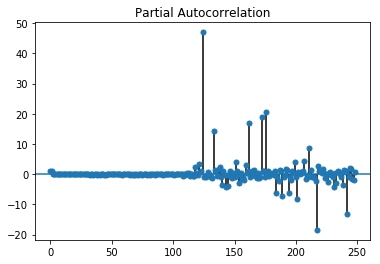

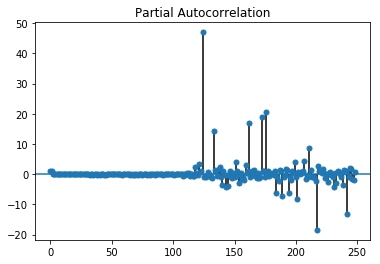

In [203]:
plot_pacf(INFY['Close'])

In [204]:
p_tcs1= figure(title = "TCS",x_axis_type='datetime')
p_tcs2 = figure(title = "TCS",x_axis_type='datetime',plot_height=200)
p_tcs1.line(INFY.index, TCS['Close'], color='blue', legend='TCS share price chart')
p_tcs2.line(INFY.index, TCS["volume shock"], legend='volume shock', color='red')
p_tcs1.line(INFY.index,TCS["MA_52"],legend="moving avg. 52",color='green')
#output_file("tcs.html")
#show(p_tcs)

GlyphRenderer(id='16712', ...)

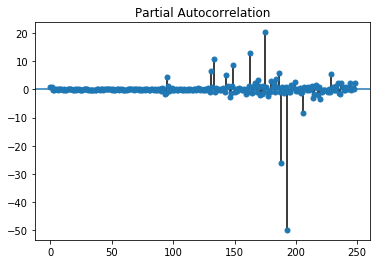

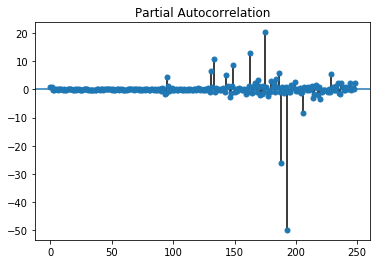

In [205]:
plot_pacf(TCS['Close'])

In [206]:
output_file("stock_file.html")
grid=gridplot([[p_tcs1,p_infy1],[p_tcs2,p_infy2]])
show(grid)
#show(column(p_infy1,p_infy2))
#show(gridplot([[p_infy,p_tcs]],plot_width=800,plot_height=800))